<a href="https://colab.research.google.com/github/Atharv09007/Cryptonite_taskphas_1/blob/main/Neural_nets_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0 | Loss: 3.6204
Epoch 500 | Loss: 0.5708
Epoch 1000 | Loss: 0.5296
Epoch 1500 | Loss: 0.4941
Epoch 2000 | Loss: 0.4687
Epoch 2500 | Loss: 0.4557

Actual | Predicted
------------------
6     | 5.76
5     | 5.19
6     | 5.80
5     | 5.29
6     | 5.70
5     | 5.23
5     | 5.24
5     | 4.99
5     | 5.73
6     | 6.18


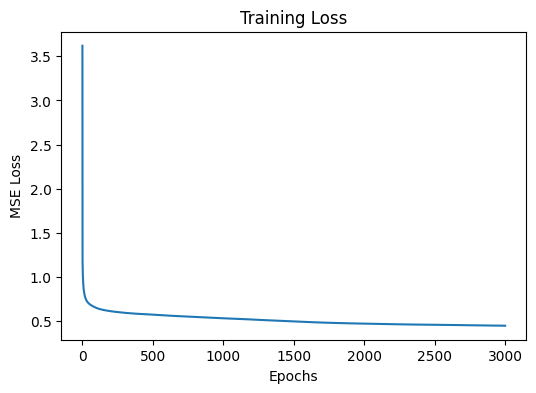

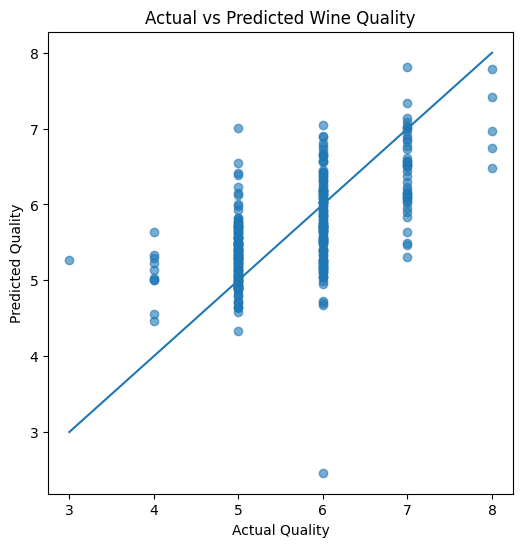

In [1]:
#Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#loading dataset
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=';'
)

X = data.drop('quality', axis=1).values
Y = data['quality'].values.reshape(-1, 1)

# Standarization manually
X = (X - X.mean(axis=0)) / X.std(axis=0)

# splitting of data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Target scaling
y_mean = y_train.mean()
y_std = y_train.std()

y_train_s = (y_train - y_mean) / y_std
y_test_s = (y_test - y_mean) / y_std

#Initialization (using HE)
np.random.seed(1)

W1 = np.random.randn(11, 16) * np.sqrt(2 / 11) #he initializing 11 - number of inputs 2 since 50 percent of the values gets removed
b1 = np.zeros((1, 16))

W2 = np.random.randn(16, 8) * np.sqrt(2 / 16)
b2 = np.zeros((1, 8))

W3 = np.random.randn(8, 1) * np.sqrt(2 / 8)
b3 = np.zeros((1, 1))
#using the HE initialization ( root (2/n)) as it maintains variance of activations in ReLU networks by compensating for half of the neurons being inactive

# Activation functions (relu)
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# forward propagation manually
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = Z3  # Linear output

    return Z1, A1, Z2, A2, Z3, A3

# Loss function (here used mean squared error)
def mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)

# Backpropagation to update weights and biases using chain rule
def backward(X, y, Z1, A1, Z2, A2, A3):
    m = X.shape[0]

    dZ3 = (2/m) * (A3 - y)
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

# Training
learning_rate = 0.05
epochs = 3000
losses = []

for epoch in range(epochs):
    Z1, A1, Z2, A2, Z3, A3 = forward(X_train)
    loss = mse(y_train_s, A3)
    losses.append(loss)

    dW1, db1, dW2, db2, dW3, db3 = backward(
        X_train, y_train_s, Z1, A1, Z2, A2, A3
    )

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

# Testing
_, _, _, _, _, y_pred_s = forward(X_test)
y_pred = y_pred_s * y_std + y_mean

# Predictions
print("\nActual | Predicted")
print("------------------")
for i in range(10):
    print(f"{int(y_test[i][0])}     | {y_pred[i][0]:.2f}")

# Graphs
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([3,8], [3,8])
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()
